# Project - Customer Churn Prediction Model

In this project, our aim is to building a model for predicting churn. Customer churn (or attrition) is the percentage of customers that discontinue using a company’s products or services during a particular time period.

Thus, in the given dataset, our label will be the `Churn` column.


## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.

## Candidate Name : Michael Kiiru

## **1. Data Understanding & Exploration**

### 1.1 Pre-requisites

In [51]:
# Import required libraries

#--- data manipulation
import pandas as pd
import numpy as np

#--- Viz
import seaborn as sns
import matplotlib.pyplot as plt

###1.2 Loading and Previewing Data

In [52]:
# Read csv with customer records and sample few records with head() method of a dataframe.

df = pd.read_csv("churn.csv")
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [53]:
# Check the dataset dimensions. 

df.shape

(3333, 11)

In [54]:
# Load the glossary for all the 11 features of the dataset.

glossary = pd.read_csv('glossary.csv')
glossary

,Field,Description
0,Churn,The data label. Indicates whether the customer...
1,AccountWeeks,Age of the customer account.
2,ContractRenewal,Boolean field to indicate whether the contract...
3,DataPlan,Whether customer has data plan or not
4,DataUsage,Data usage to date for the customer
5,CustServCalls,How many times the customer has called the IVR...
6,DayMins,Total usage of day minutes in plan for the cus...
7,DayCalls,Total number of calls customer has made during...
8,MonthlyCharge,How much the customer has been charged per month
9,OverageFee,Extra amount of money the customer paysover th...


In [55]:
# .info() method to get more information about our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [56]:
# An alternative to checking if we have null values in the dataset

df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [57]:
# Check to see if we have duplicate customer records in the dataset. 
# Duplicate values may give the particular data object an advantage in machine learning algorithms.

df.duplicated().any()

False

In [58]:
# Check to confirm if indeed the boolean columns are not violated.

print(df['Churn'].unique())
print(df['DataPlan'].unique())
print(df['ContractRenewal'].unique())

[0 1]
[1 0]
[1 0]


<em> From the above examination, we notice that:
1. The dataset has 3,333 rows (customer records) and 11 columns (customer call features). 
2. The dataset has no null values (missing values) in any of the records.
3. All the features are numeric in data type (float64 and int64) 
4. The dataset does not have any duplicated customer records. 
5. For columns with boolean values, no extra values have been introduced but just 1s and 0s.

With this clarity, the dataset is ready for further exploration and analysis</em>

## 2. Exploratory Data Analysis

### 2.1 Univariate Analysis

In [59]:
# Summary statistics

df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


Tabular Distibution of Customer Attrition: 

0    2850
1     483
Name: Churn, dtype: int64 



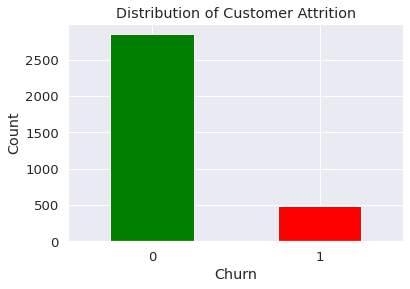

In [60]:
# Distribution of the label feature.

# Tabular distribution of the label

print('Tabular Distibution of Customer Attrition: \n')
print(df.Churn.value_counts(), '\n')

# Plot
sns.set(font_scale=1.2, palette='deep', color_codes=True)
plt.figure(figsize = (6, 4))
df.Churn.value_counts().plot(kind = 'bar', rot = 0, color = ['green', 'red'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Customer Attrition')
plt.show()

<em>Taking "1" for Yes and "0" for NO, we notice that our recordset has about 14% of the records where customers churned. This is an indication of an imbalanced dataset wrt this target variable, Churn. </em>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


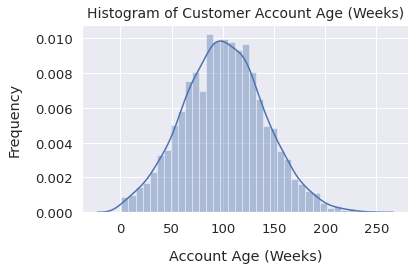

In [61]:
# Histogram distribution for the age of customer accounts.

sns.distplot(df.AccountWeeks)
plt.xlabel("Account Age (Weeks)", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Histogram of Customer Account Age (Weeks)", fontsize=14, y=1.01) 
plt.tight_layout()
plt.show()

<em>The customers' account age feature is normaly distributed with a mean of 101 weeks. </em>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

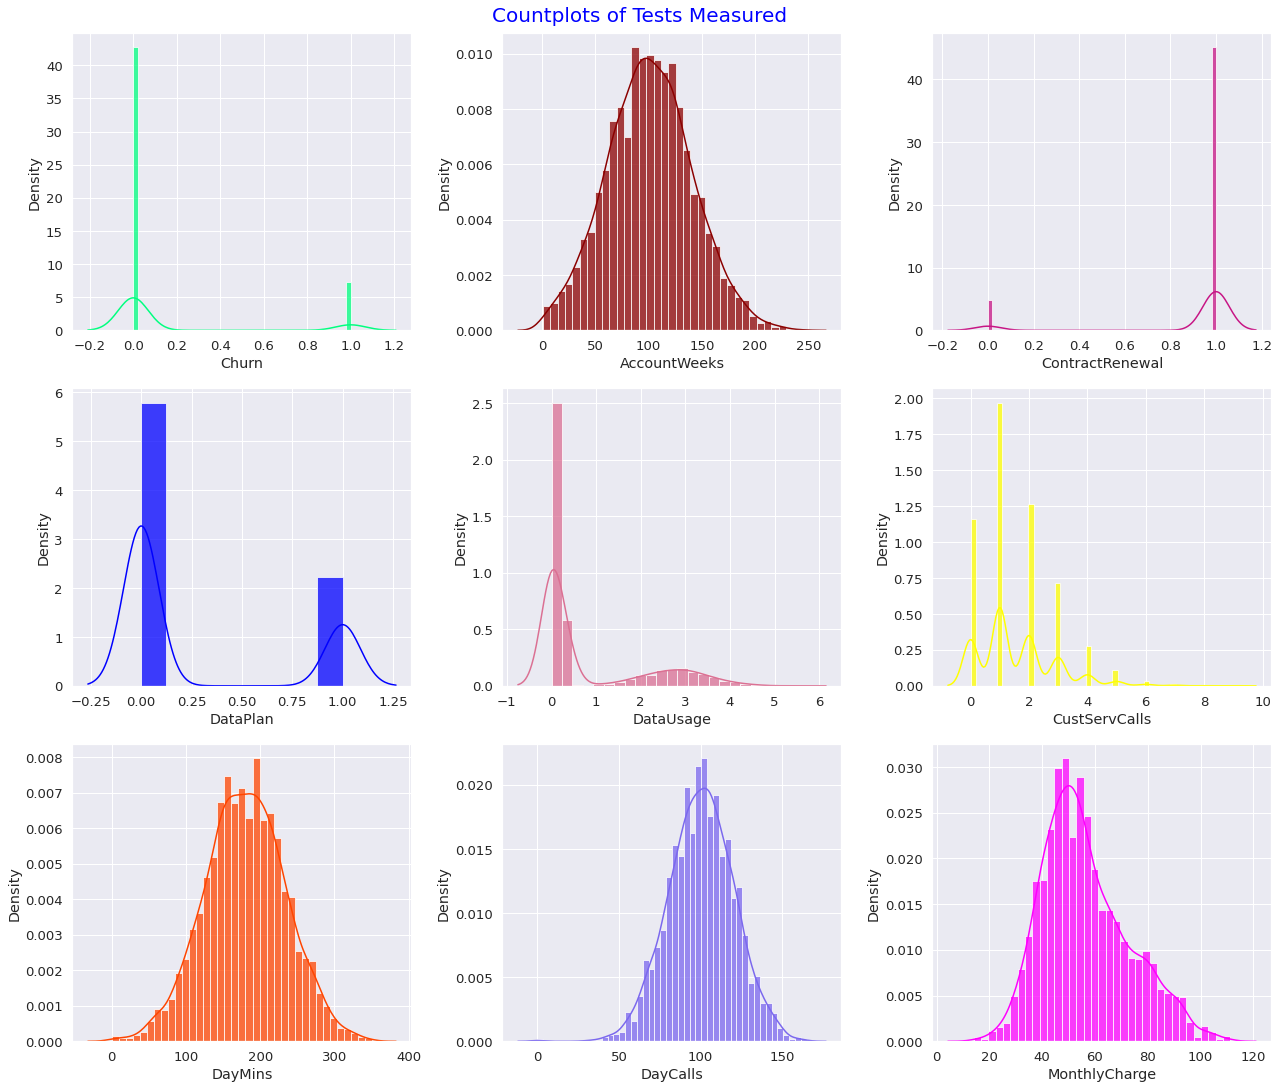

In [62]:
# plotting the histograms of all the other numerical variables
myCols = df.columns.to_list()

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (18, 15))
plt.suptitle('Countplots of Tests Measured', fontsize = 20, y = 1.01, color = 'blue')

colors = ['#00FF7F', '#8B0000', '#C71585', '#0000FF', '#DB7093', '#FFFF00', '#FF4500',
          '#7B68EE', '#FF00FF', '#ADFF2F', '#FFD700', '#A52A2A', '#2F4F4F', '#8B008B']
for ax, column, color in zip(axes.flatten(), myCols, colors):
    sns.distplot(df[column], ax = ax, color = color, hist_kws = dict(alpha = 0.75))
    
plt.tight_layout()

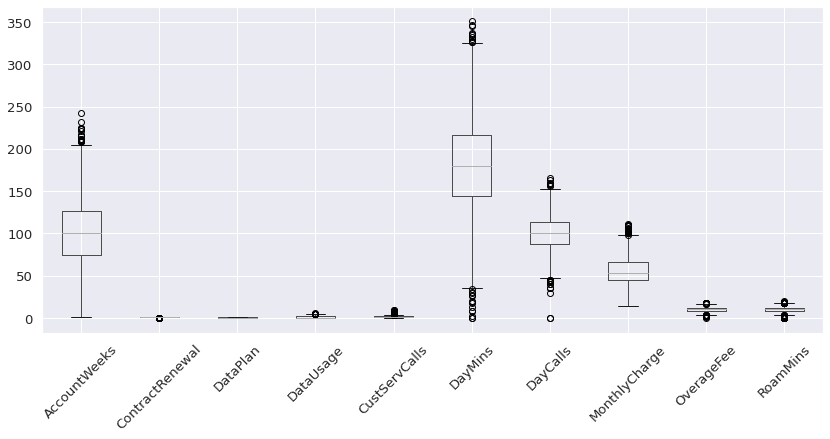

In [63]:
# looking for outliers

myCols.remove('Churn')
plt.figure(figsize = (14, 6))
df.boxplot(myCols)
plt.xticks(rotation = 45)
plt.show()

### 2.2 Bivariate Analysis

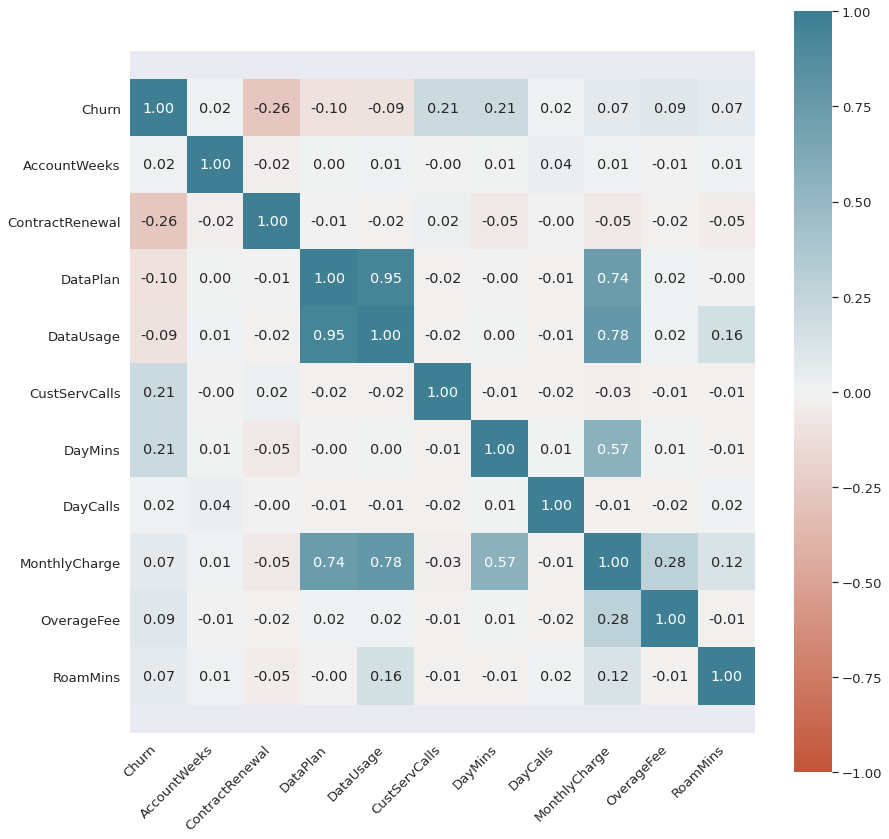

In [64]:
# Investigate to see if there is any significant correlation between the features of the dataset.

corr = df.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True,
    fmt='.2f'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

<em>From the above heatmap, we notice that `DataUsage` and `DataPlan` have a correlation coefficient of 0.95 (positive) indicating a very strong linear relationship between these variables. <br>
    
Other variables with strong correlation coefficients are `MonthlyCharge`/`DataPlan` at 0.74 (positive), `MonthlyCharge`/`DataUsage` at 0.78 (positive) and also `MonthlyCharge` / `DayMins` at 0.57(positive) <br>

Important to note is that `Monthly charge` attribute is a calculated attribute and which is dependent on the usage of both data and calls (intuitively). We will therefore drop this field. 

We avoid highly correlated independent variables when creating machine learning models because they can skew the output. The above pairs are thus candidates for feature engineering.</em>

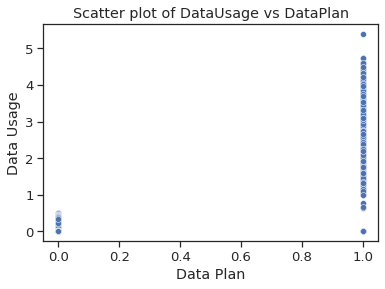

In [65]:
# Let's investigate the relationship between `DataPlan` and `DataUsage` using a scatter plot.

sns.set_style("ticks")
sns.scatterplot(x="DataPlan", y="DataUsage", data = df) 
plt.title('Scatter plot of DataUsage vs DataPlan') 
plt.xlabel('Data Plan') 
plt.ylabel('Data Usage');

<em>From the above, it's evident that as the data usage increases, so does the data plan. Further, we highlight that there are about 20% of the customer data usage records where even when there is no data plan for the customer. </em>

In [66]:
# drop the MonthlyCharge field.

df.drop(columns=['MonthlyCharge'], inplace=True)
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,7.42,10.1


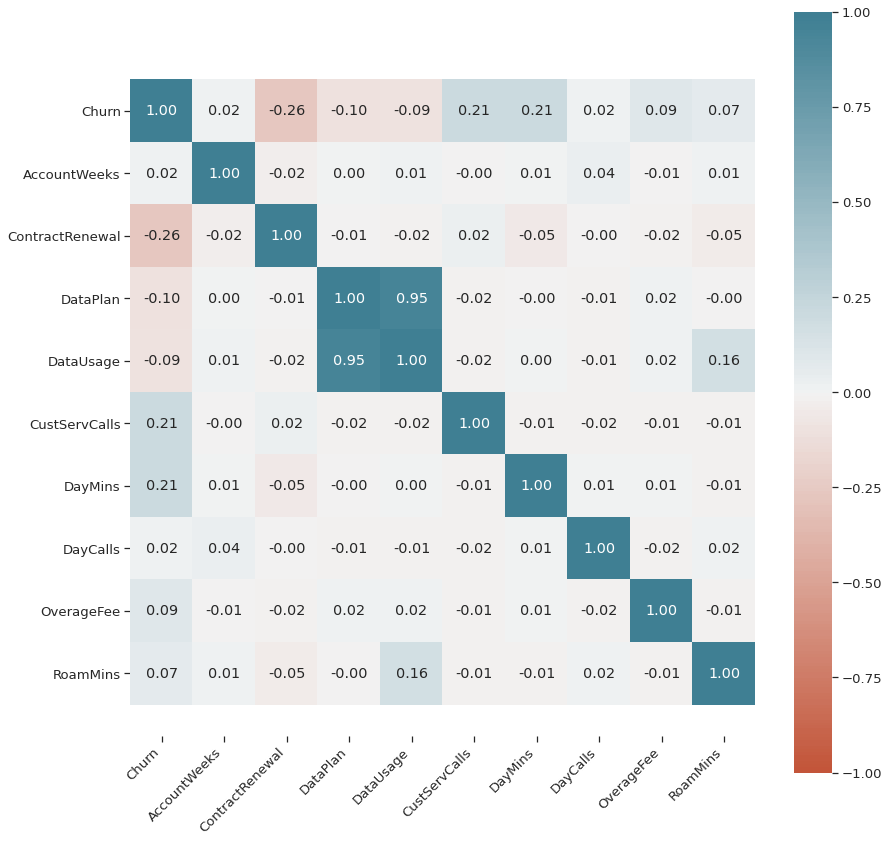

In [67]:
# With this new tweak, we reconfirm the correlation of the variables.

corr = df.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True,
    fmt='.2f'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

<em>With this we notice that our modification has resolved part of the earlier noted high correlation between variables, but have retained the near-perfect correlation of coefficient 0.95 (positive) between `DataUsage` and `DataPlan`. 

Data usage is influenced heavily by data plan (boolean). We have customers with data usage records though not on any dta plan, we will therefore drop the data plan field and retain DataUsage.</em>

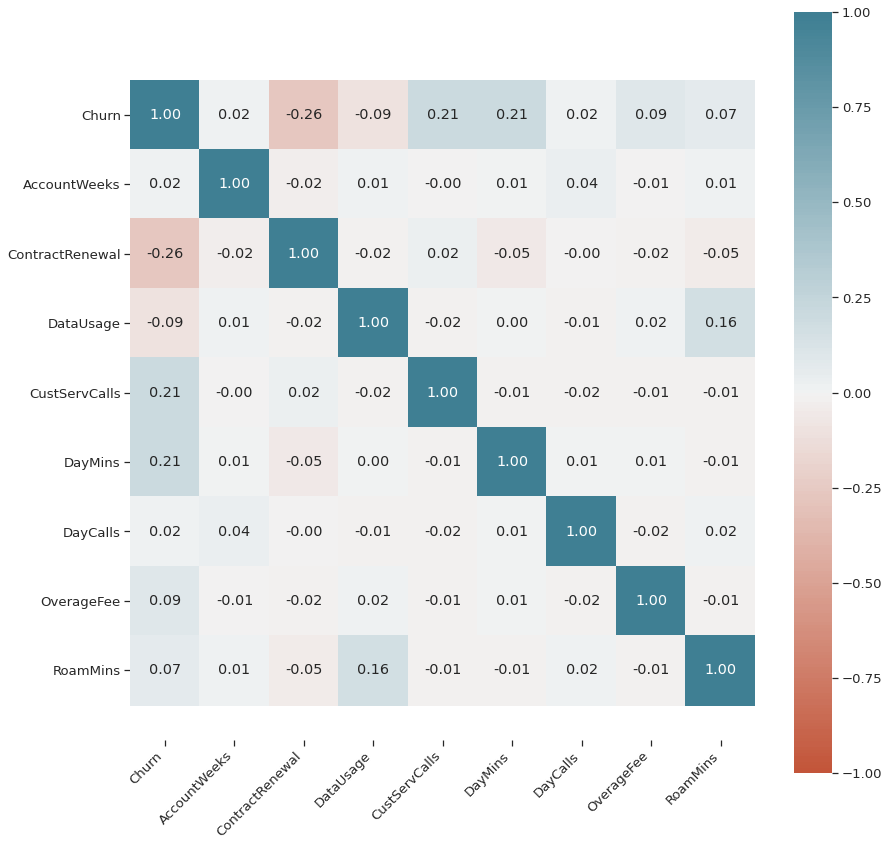

In [68]:
# Drop `DataPlan` feature from the dataset.
df.drop(columns = ['DataPlan',], inplace = True)

# Reconfirm the relationships.
corr = df.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True,
    fmt='.2f'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

<em>We now have a clean dataset with no missing values, no duplicates and no correlated independent variables, that we can use to train our ML model</em>

In [69]:
# Write the data to a file for permanency.

df.to_csv('churn_shaped.csv', index = False)

## 3. Data Modelling


### 3.1 Reading and Preparing the Training Dataset

Helper Methods for Metrics

In [111]:
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score

def two_d_compare(X_test,y_test,y_pred,model_name):
    area = (12 * np.random.rand(40))**2 
    plt.subplots(ncols=2, figsize=(10,4))
    plt.suptitle('Actual vs Predicted data : ' +model_name + '. Variance score: %.2f' % r2_score(y_test, y_pred))

    plt.subplot(121)
    plt.scatter(X_test, y_test, alpha=0.8, color='#8CCB9B')
    plt.title('Actual')

    plt.subplot(122)
    plt.scatter(X_test, y_pred,alpha=0.8, color='#E5E88B')
    plt.title('Predicted')

    plt.show()
    

def model_metrics(regressor,y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared error: %.2f"
      % mse)
    r2 = r2_score(y_test, y_pred)
    print('R2 score: %.2f' % r2 )
    return [mse, r2]

def two_vs_three(x_test,y_test,y_pred,z=None, isLinear = False) : 
    
    area = 60
    

    fig = plt.figure(figsize=(12,6))
    fig.suptitle('2D and 3D view of Churn')

    # First subplot
    ax = fig.add_subplot(1, 2,1)
    ax.scatter(x_test, y_test, alpha=0.5,color='blue', s= area)
    ax.plot(x_test, y_pred, alpha=0.9,color='red', linewidth=2)
    ax.set_xlabel('WeekAge')
    ax.set_ylabel('Churn')
    
    plt.title('Age in Weeks vs Churn')
    
    if not isLinear : 
    # Second subplot
        ax = fig.add_subplot(1,2,2, projection='3d')

        ax.scatter(z, x_test, y_test, color='blue', marker='o')
        ax.plot(z, x_test, y_pred, alpha=0.9,color='red', linewidth=2)
        ax.set_ylabel('Account Age in Weeks')
        ax.set_zlabel('Churn')
        ax.set_xlabel('Data Bill')

    plt.title('Account Age in Week vs Data Bill vs Churn')

    plt.show()

In [70]:
df_shaped = pd.read_csv('churn_shaped.csv')
df_shaped.head()

,Churn,AccountWeeks,ContractRenewal,DataUsage,CustServCalls,DayMins,DayCalls,OverageFee,RoamMins
0,0,128,1,2.7,1,265.1,110,9.87,10.0
1,0,107,1,3.7,1,161.6,123,9.78,13.7
2,0,137,1,0.0,0,243.4,114,6.06,12.2
3,0,84,0,0.0,2,299.4,71,3.10,6.6
4,0,75,0,0.0,3,166.7,113,7.42,10.1


In [71]:
# list the columns and the datatype

df_shaped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataUsage        3333 non-null   float64
 4   CustServCalls    3333 non-null   int64  
 5   DayMins          3333 non-null   float64
 6   DayCalls         3333 non-null   int64  
 7   OverageFee       3333 non-null   float64
 8   RoamMins         3333 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 234.5 KB


In [79]:
# Divide the dataset into attributes and labels to be used for multiple linear regression and classification. (predictors into 'X' and dependent variable into 'y')

X=df_shaped.iloc[:,1:9].values
y=df_shaped['Churn'].values
	
print(X.shape)
print(y.shape)

(3333, 8)
(3333,)


In [81]:
# Splitting the dataset into a train set and test set to be used for multiple linear regression and classification.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [153]:
# Feature scaling / normalisation given the variance in the values for some of the features.
# Most of the features are well mormalized as seen in the univariate analysis and so scaling would be important.

from sklearn import preprocessing

# RobustScaler handles (removes) the outliers
robust_scaler = preprocessing.RobustScaler()
X_train = robust_scaler.fit_transform(X_train)
X_test= robust_scaler.transform(X_test)

# set the scaler, fit the training dataset and transform X_train and X_test.
minmax_scaler=preprocessing.MinMaxScaler().fit(X_train)
	
X_train=minmax_scaler.transform(X_train)
X_test=minmax_scaler.transform(X_test)

### 3.2 Regression Modeling (Base)

#### 3.2.1 Simple Linear Regression

In [121]:
# Assuming that Churn is only affected by Contract Renewal (See the estimation of coefficients above)

X_slr = df['ContractRenewal'].values.reshape(-1,1)
y_slr = df['Churn']
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(X_slr, y_slr, random_state=0)

print("Dimensions of training dataset : Input features"+str(X_train_slr.shape)+ " Output label" + str(y_train_slr.shape))
print("Dimensions of testing dataset : Input features"+str(X_test_slr.shape)+ " Output label" + str(y_test_slr.shape))

Dimensions of training dataset : Input features(2499, 1) Output label(2499,)
Dimensions of testing dataset : Input features(834, 1) Output label(834,)


In [122]:
# Load # Linear Regression classifier
from sklearn.linear_model import LinearRegression

model_name = 'Simple Linear Regression'

# Instantiate classifier
slRegressor = LinearRegression()

# Fit the training data (train our classifiers based on the train dataset)
slRegressor.fit(X_train_slr,y_train_slr)

# Make predictions based on the learning done.
y_pred_slr= slRegressor.predict(X_test_slr)

*Evaluation of the model*

In [123]:
# comparing the actual output values with the predicted values

compare = pd.DataFrame({
    'Actual' : y_test_slr,
    'Predicted ' : y_pred_slr
})

# previewing 10 samples
compare.sample(10)

,Actual,Predicted
488,0,0.117933
2979,1,0.117933
3126,0,0.117933
2133,0,0.117933
3175,0,0.117933
2654,0,0.117933
1651,1,0.429787
489,0,0.117933
3237,0,0.429787
3109,0,0.429787


In [124]:
print('Intercept: \n',slRegressor.intercept_)
print('Coefficients: \n', slRegressor.coef_)

Intercept: 
 0.42978723404255353
Coefficients: 
 [-0.31185437]


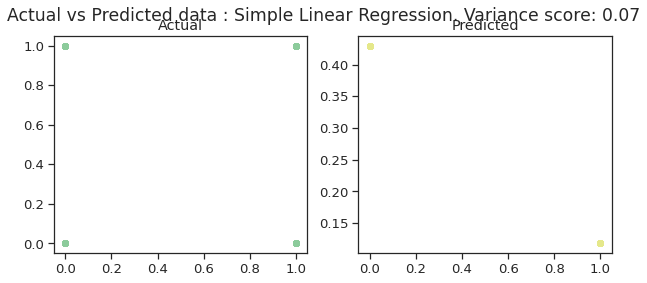

In [125]:
two_d_compare(X_test_slr,y_test_slr,y_pred_slr,model_name)

In [131]:
slrMetrics = model_metrics(slRegressor,y_test_slr,y_pred_slr)
print('10% of Churn : ', df.Churn.mean() * 0.1)


Mean squared error: 0.11
R2 score: 0.07
10% of Churn :  0.014491449144914494


#### 3.2.2 Multiple Linear Regression

In [132]:
# Confirm the values of preprocessed array X (predictors) and target y (predicted / dependent variable).

print('The values of array X is: \n', X)
print('\n\nThe values of target variable y is: \n', y)

The values of array X is: 
 [[128.     1.     2.7  ... 110.     9.87  10.  ]
 [107.     1.     3.7  ... 123.     9.78  13.7 ]
 [137.     1.     0.   ... 114.     6.06  12.2 ]
 ...
 [ 28.     1.     0.   ... 109.    14.44  14.1 ]
 [184.     0.     0.   ... 105.     7.98   5.  ]
 [ 74.     1.     3.7  ... 113.    13.3   13.7 ]]


The values of target variable y is: 
 [0 0 0 ... 0 0 0]


In [134]:
# Create a linear regression model object
# fit() - fits a linear model, 
# score() - Returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by 
# the model, as the proportion of total variation of outcomes explained by the model.

# Instantiate the regressor
mlRegressor = LinearRegression(normalize=False)
mlRegressor.fit(X_train,y_train)

# Train the model
print("Score of the train set : ",mlRegressor.score(X_train,y_train))
print("Score of the test set : ",mlRegressor.score(X_test,y_test))

Score of the train set :  0.1776506592928162
Score of the test set :  0.1600978901089558


Compute the Adjusted $R^2$

Adjusted $R^2$ indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. If you add more and more useless variables to a model, adjusted r-squared will decrease. If you add more useful variables, adjusted r-squared will increase. Adjusted  $R^2$  will always be less than or equal to $R^2$ .

In [136]:
def adj_r2 (X,y,model):
    r_squared = model.score(X,y)
    return(1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1))

print("Adjusted R2 of the train set : ",adj_r2(X_train,y_train,mlRegressor))
print("Adjusted R2 of the test set : ",adj_r2(X_test,y_test,mlRegressor))

Adjusted R2 of the train set :  0.17500857305761253
Adjusted R2 of the test set :  0.15195338480092146


In [137]:
# .coef_ gives the coefficients and .intercept_ gives the estimated intercepts.

importance = mlRegressor.coef_
for i in range(len(importance)):
    print("Feature:", df.columns[i], "		Score :", importance[i])

Feature: Churn 		Score : 0.03360975028506337
Feature: AccountWeeks 		Score : -0.29682037927816085
Feature: ContractRenewal 		Score : -0.13642461753808552
Feature: DataUsage 		Score : 0.5551325265104629
Feature: CustServCalls 		Score : 0.47415199223268384
Feature: DayMins 		Score : 0.025282494098196287
Feature: DayCalls 		Score : 0.20920826701251827
Feature: OverageFee 		Score : 0.16231906196413468


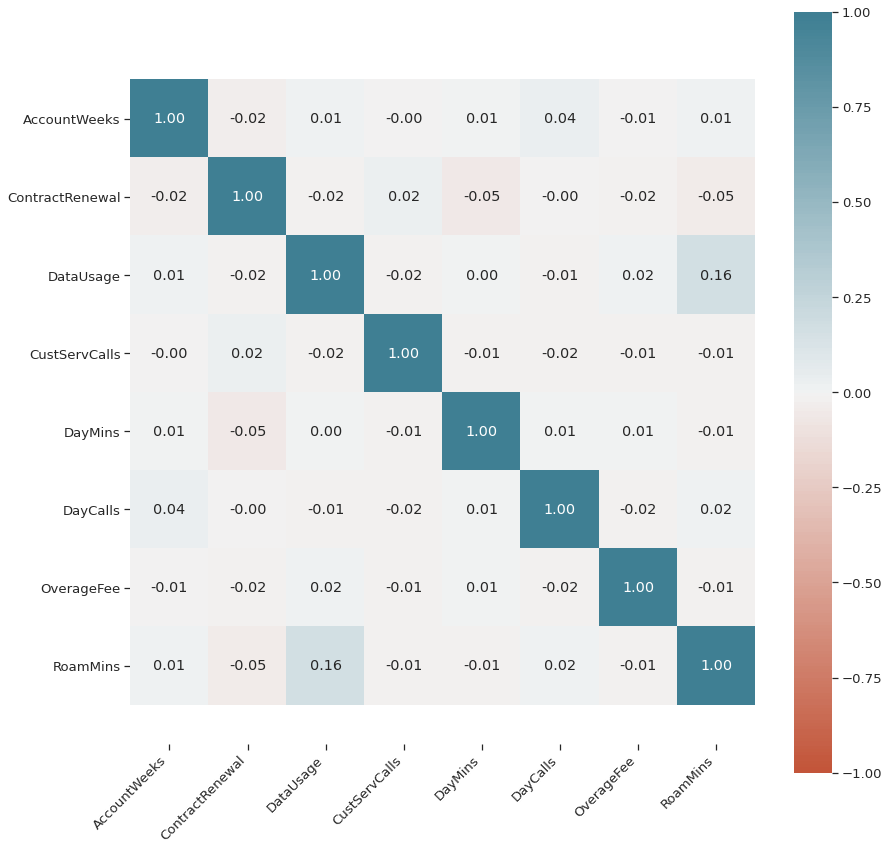

In [138]:
# Checking to see correlation of the features

df_lr = pd.DataFrame(X)
df_lr.columns=['AccountWeeks','ContractRenewal','DataUsage','CustServCalls','DayMins','DayCalls','OverageFee','RoamMins']

corr = df_lr.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True,
    fmt='.2f'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [139]:
# Scaling 

from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df_lr))
z

array([[0.67648946, 0.32758048, 1.48020373, ..., 0.47664315, 0.0715836 ,
        0.08500823],
       [0.14906505, 0.32758048, 2.26607248, ..., 1.12450284, 0.10708191,
        1.24048169],
       [0.9025285 , 0.32758048, 0.64164192, ..., 0.67598459, 1.57434567,
        0.70312091],
       ...,
       [1.83505538, 0.32758048, 0.64164192, ..., 0.42680779, 1.73094204,
        1.3837779 ],
       [2.08295458, 3.05268496, 0.64164192, ..., 0.22746635, 0.81704825,
        1.87621082],
       [0.67974475, 0.32758048, 2.26607248, ..., 0.62614923, 1.28129669,
        1.24048169]])

In [140]:
# Outliers

len(np.where(z > 3)[0])

418

In [141]:
#dropping the outliers

outliers = list(set(np.where(z > 3)[0]))
new_df = df_lr.drop(outliers, axis = 0).reset_index(drop = False)
display(new_df)

y_new = y[list(new_df["index"])]
len(y_new)

,index,AccountWeeks,ContractRenewal,DataUsage,CustServCalls,DayMins,DayCalls,OverageFee,RoamMins
0,0,128.0,1.0,2.70,1.0,265.1,110.0,9.87,10.0
1,1,107.0,1.0,3.70,1.0,161.6,123.0,9.78,13.7
2,2,137.0,1.0,0.00,0.0,243.4,114.0,6.06,12.2
3,6,121.0,1.0,2.03,3.0,218.2,88.0,17.43,7.5
4,8,117.0,1.0,0.19,1.0,184.5,97.0,17.58,8.7
...,...,...,...,...,...,...,...,...,...
2921,3327,79.0,1.0,0.00,2.0,134.7,98.0,9.49,11.8
2922,3328,192.0,1.0,2.67,2.0,156.2,77.0,10.78,9.9
2923,3329,68.0,1.0,0.34,3.0,231.1,57.0,7.67,9.6
2924,3330,28.0,1.0,0.00,2.0,180.8,109.0,14.44,14.1


2926

In [142]:
# scaling features

X_new = new_df.drop('index', axis = 1)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = StandardScaler().fit_transform(X_new)
X_scaled

array([[ 0.69323389,  0.        ,  1.50074145, ...,  0.48436849,
        -0.07057619, -0.09828276],
       [ 0.16367101,  0.        ,  2.29424503, ...,  1.14931756,
        -0.10662751,  1.28447079],
       [ 0.92018941,  0.        , -0.64171822, ...,  0.68896821,
        -1.59674853,  0.72389502],
       ...,
       [-0.81980292,  0.        , -0.37192701, ..., -2.22657771,
        -0.95183056, -0.24776963],
       [-1.82849413,  0.        , -0.64171822, ...,  0.43321857,
         1.76002947,  1.43395766],
       [-0.66849924,  0.        ,  2.29424503, ...,  0.63781828,
         1.30337948,  1.28447079]])

In [143]:
# checking the accuracy again with the outliers dropped and features scaled

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_new, test_size=0.3, random_state=42)

modelb = LinearRegression(normalize=False)
modelb.fit(X_train,y_train)

print("Score of the train set :",modelb.score(X_train,y_train))
print("Score of the test set :",modelb.score(X_test,y_test))


Score of the train set : 0.12750080823527032
Score of the test set : 0.13044182303545881


### 3.3 Regression Modeling (Using Ensemble Regresors)

In [172]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import BaggingRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb


# Creating our regressors, We'll just use the decision tree regressor this time
# ---
# 
regressor = DecisionTreeRegressor()

# Then creating our ensemble regressors
# ---

# Bagging Regressors
# ---
bagging_est_regressor = BaggingRegressor()
random_forest_regressor = RandomForestRegressor()

# Boosting Regressors
# ---
ada_boost_regressor = AdaBoostRegressor()
gbm_regressor = GradientBoostingRegressor()
xgboost_regressor = xgb.XGBRegressor(objective ='reg:squarederror') # It requires us to specify the objective function

# Fitting our data to our regressors 
# ---
# Decision Tree Regressor
regressor.fit(X_train, y_train)

# Bagging Regressors
# ---
bagging_est_regressor.fit(X_train, y_train)
random_forest_regressor.fit(X_train, y_train)

# Boosting Regressors
# ---
ada_boost_regressor.fit(X_train, y_train)
gbm_regressor.fit(X_train, y_train)
xgboost_regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [173]:
# Making predictions using our models
# ---
#  
y_pred = regressor.predict(X_test)

# Bagging Regressors
# ---
bag_est_y_pred = bagging_est_regressor.predict(X_test)
random_forest_y_pred = random_forest_regressor.predict(X_test)

# Boosting Regressors
# ---
ada_boost_y_pred = ada_boost_regressor.predict(X_test)
gbm_y_pred = gbm_regressor.predict(X_test)
xgboost_y_pred = xgboost_regressor.predict(X_test)

In [174]:
# Next, we compare actual output values for X_test with the predicted values
# ---
#
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(5)

,Actual,Predicted
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [175]:
# We make predictions for the adaboost regressor
# ---
# Next, we compare actual output values for X_test with the predicted values
# ---
ada_boost_df = pd.DataFrame({'Actual': y_test, 'Predicted': ada_boost_y_pred})
ada_boost_df.head(5)

,Actual,Predicted
0,0,0.193133
1,0,0.024010
2,0,0.024010
3,0,0.128205
4,0,0.024010


In [176]:
# We make predictions for the gbm regressor
# ---
# Next, we compare actual output values for X_test with the predicted values
# ---
gbm_df = pd.DataFrame({'Actual': y_test, 'Predicted': gbm_y_pred})
gbm_df.head(5)

,Actual,Predicted
0,0,0.049694
1,0,0.011366
2,0,0.040794
3,0,0.045940
4,0,0.020439


In [177]:
# We also predict for the XGboost regressor
# ---
# Next, we compare actual output values for X_test with the predicted values
# ---
xgboost_df = pd.DataFrame({'Actual': y_test, 'Predicted': xgboost_y_pred})
xgboost_df.head(5)

,Actual,Predicted
0,0,0.020933
1,0,0.017758
2,0,0.040423
3,0,0.063236
4,0,0.020954


Model Evaluation

In [178]:
# NB: The closer the RMSE is to 0, the better the model.
#  
from sklearn.metrics import mean_squared_error

print('Decision Tree - Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Bagging Regressors
# ---
print('Bagging Estimator - Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, bag_est_y_pred)))
print('Random Forest - Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, random_forest_y_pred)))

# Boosting Regressors
# ---
print('Ada Boost - Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, ada_boost_y_pred)))
print('GBM - Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, gbm_y_pred)))
print('XGBoost - Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, xgboost_y_pred)))

Decision Tree - Root Mean Squared Error: 0.2961407041065135
Bagging Estimator - Root Mean Squared Error: 0.2171203124268596
Random Forest - Root Mean Squared Error: 0.2054915214208465
Ada Boost - Root Mean Squared Error: 0.24406720064571666
GBM - Root Mean Squared Error: 0.21650191148994627
XGBoost - Root Mean Squared Error: 0.21658544592067866


In [180]:
slrMetrics = model_metrics(regressor,y_test_slr,y_pred_slr)
print('10% of Churn : ', df_shaped.Churn.mean() * 0.1)

Mean squared error: 0.11
R2 score: 0.07
10% of Churn :  0.014491449144914494


In [181]:
slrMetrics = model_metrics(gbm_regressor,y_test_slr,y_pred_slr)
print('10% of Churn : ', df_shaped.Churn.mean() * 0.1)


Mean squared error: 0.11
R2 score: 0.07
10% of Churn :  0.014491449144914494


In [182]:
slrMetrics = model_metrics(ada_boost_regressor,y_test_slr,y_pred_slr)
print('10% of Churn : ', df_shaped.Churn.mean() * 0.1)


Mean squared error: 0.11
R2 score: 0.07
10% of Churn :  0.014491449144914494


### 3.4 Classification Modeling (Base)

In [144]:
# Import necessary libraries

from sklearn.linear_model import LogisticRegression # Logistic Regression Classifier
from sklearn.tree import DecisionTreeClassifier     # Decision Tree Classifier
from sklearn.svm import SVC                         # SVM Classifier
from sklearn.naive_bayes import GaussianNB          # Naive Bayes Classifier
from sklearn.neighbors import KNeighborsClassifier  # KNN Classifier


from sklearn.metrics import classification_report, confusion_matrix
from scipy import stats

In [145]:
# instantiating classifiers

logistic_classifier = LogisticRegression(random_state = 0, solver='lbfgs')
decision_classifier = DecisionTreeClassifier()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier(n_neighbors=5)
nb_classifier = GaussianNB()

In [147]:
# fitting classifiers to the training data

logistic_classifier.fit(X_train, y_train)
decision_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [151]:
# making predictions
y_pred_lr = logistic_classifier.predict(X_test) 
y_pred_tree = decision_classifier.predict(X_test) 
y_pred_svm = svm_classifier.predict(X_test) 
y_pred_knn = knn_classifier.predict(X_test) 
y_pred_nb = nb_classifier.predict(X_test)

*Evaluating the different classification models*

In [152]:
# printing the classification report for each classifier to assess performance
from sklearn.metrics import classification_report

# classification report for Logistic Regression
print("Logistic Regression classification report:")
print('Accuracy : ', str(accuracy_score(y_pred_lr, y_test)))
print(classification_report(y_test, y_pred_lr))
print()

# classification report for Gaussian Naive Bayes Classifier
print("Gaussian Naive Bayes classification report:")
print('Accuracy: ', str(accuracy_score(y_pred_nb, y_test)))
print(classification_report(y_test, y_pred_nb))
print()

# classification report for Decision Tree Classifier
print("Decision Tree classification report:")
print('Accuracy : ', str(accuracy_score(y_pred_tree, y_test)))
print(classification_report(y_test, y_pred_tree))
print()

# classification report for K-Nearest Neighbors Classifier
print("K-Nearest Neighbors classification report:")
print('Accuracy :', str(accuracy_score(y_pred_knn, y_test)))
print(classification_report(y_test, y_pred_knn))
print()

# classification report for Support Vector Machine Classifier
print("Support Vector Machine classification report:")
print('Accuracy :', str(accuracy_score(y_pred_svm, y_test)))
print(classification_report(y_test, y_pred_svm))
print()

Logistic Regression classification report:
Accuracy :  0.8952164009111617
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       780
           1       0.71      0.10      0.18        98

    accuracy                           0.90       878
   macro avg       0.81      0.55      0.56       878
weighted avg       0.88      0.90      0.86       878


Gaussian Naive Bayes classification report:
Accuracy:  0.9020501138952164
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       780
           1       0.75      0.18      0.30        98

    accuracy                           0.90       878
   macro avg       0.83      0.59      0.62       878
weighted avg       0.89      0.90      0.87       878


Decision Tree classification report:
Accuracy :  0.9031890660592256
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       780
           1       

### 3.5 Classification Modeling (Using Ensemble Classifiers)

In [154]:
from sklearn.ensemble import BaggingClassifier           # Bagging Meta-Estimator Classifier
from sklearn.ensemble import RandomForestClassifier      # RandomForest Classifier 
from sklearn.ensemble import AdaBoostClassifier          # AdaBoost Classifier
from sklearn.ensemble import GradientBoostingClassifier  # AdaBoost GradientBoostingClassifier
import xgboost as xgb                                    # Importing the XGBoost library

In [155]:
# Implement ensemble methods by first using Bagging Classifiers

bagging_meta_classifier = BaggingClassifier()
random_forest_classifier = RandomForestClassifier()

# Boosting Classifiers
# ---
ada_boost_classifier = AdaBoostClassifier()
gbm_classifier = GradientBoostingClassifier() 
xg_boost_classifier = xgb.XGBClassifier() 

In [156]:
# Fitting 

# Bagging Classifiers
# ---
bagging_meta_classifier.fit(X_train, y_train)
random_forest_classifier.fit(X_train, y_train)

# Boosting Classifiers
# ---
ada_boost_classifier.fit(X_train, y_train)
gbm_classifier.fit(X_train, y_train)
xg_boost_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [157]:
# Predict Results.
# Bagging Classifiers
# ---
bagging_y_classifier = bagging_meta_classifier.predict(X_test) 
random_forest_y_classifier = random_forest_classifier.predict(X_test) 

# Boosting Classifiers
# ---
ada_boost_y_classifier = ada_boost_classifier.predict(X_test)
gbm_y_classifier = gbm_classifier.predict(X_test)
xg_boost_y_classifier = xg_boost_classifier.predict(X_test)

In [159]:
# We then import evaluation metrics to determine the accuracy of classifiers

from sklearn.metrics import classification_report, accuracy_score 

print("Logistic Regression Classifier", round(accuracy_score(y_pred_lr, y_test),2))
print("Decision Trees Classifier", accuracy_score(y_pred_tree, y_test))
print("SVM Classifier", accuracy_score(y_pred_svm, y_test))
print("KNN Classifier", accuracy_score(y_pred_knn, y_test))
print("Naive Bayes Classifier", accuracy_score(y_pred_nb, y_test))

# Bagging Classifiers

print("Bagging Classifier", accuracy_score(bagging_y_classifier, y_test))
print("Random Forest Classifier", accuracy_score(random_forest_y_classifier, y_test))

# Boosting Classifiers

print("Ada Boost Classifier", accuracy_score(ada_boost_y_classifier, y_test))
print("GBM Classifier", accuracy_score(gbm_y_classifier, y_test))
print("XGBoost Classifier", accuracy_score(xg_boost_y_classifier, y_test))

Logistic Regression Classifier 0.9
Decision Trees Classifier 0.9031890660592256
SVM Classifier 0.9259681093394078
KNN Classifier 0.9111617312072893
Naive Bayes Classifier 0.9020501138952164
Bagging Classifier 0.9521640091116174
Random Forest Classifier 0.9441913439635535
Ada Boost Classifier 0.907744874715262
GBM Classifier 0.9441913439635535
XGBoost Classifier 0.9476082004555809


The accuracy score - is the simplest way to evaluate models, however, we note not for a highly imbalance dataset. (By imbalanced we mean that our original dataset would need to have an equal no's of 1 and 0's). We will therefore look at other means of classification performance measurement..

In [161]:
# Classificaition report
# 
print('Logistic classifier:')
print(classification_report(y_test, logistic_y_prediction))

print('Decision Tree classifier:')
print(classification_report(y_test, decision_y_prediction))

print('SVM Classifier:')
print(classification_report(y_test, svm_y_prediction))

print('KNN Classifier:')
print(classification_report(y_test, knn_y_prediction))

print('Naive Bayes Classifier:')
print(classification_report(y_test, y_pred_nb)) 

# Bagging Classifiers
# ---
print('Bagging Meta Classifier:')
print(classification_report(y_test, bagging_y_classifier)) 

print('Random Forest Classifier:')
print(classification_report(y_test, random_forest_y_classifier)) 


# Boosting Classifiers
# ---
print('Ada Boost Classifier:')
print(classification_report(y_test, ada_boost_y_classifier)) 

print('GBM Classifier:')
print(classification_report(y_test, gbm_y_classifier)) 

print('XGBoost Classifier:')
print(classification_report(y_test, xg_boost_y_classifier))  

Logistic classifier:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       780
           1       0.71      0.10      0.18        98

    accuracy                           0.90       878
   macro avg       0.81      0.55      0.56       878
weighted avg       0.88      0.90      0.86       878

Decision Tree classifier:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       780
           1       0.56      0.66      0.60        98

    accuracy                           0.90       878
   macro avg       0.76      0.80      0.77       878
weighted avg       0.91      0.90      0.91       878

SVM Classifier:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       780
           1       0.88      0.39      0.54        98

    accuracy                           0.93       878
   macro avg       0.91      0.69      0.75       878
weighted av

In [168]:
df.head(1)

,Churn,AccountWeeks,ContractRenewal,DataUsage,CustServCalls,DayMins,DayCalls,OverageFee,RoamMins
0,0,128,1,2.7,1,265.1,110,9.87,10.0


In [171]:
# Make a new prediction based on this training.

# We pick a case from our dataset where Churn = 0
predict_case = [[128,	1,	2.7,	1,	265.1,	110,	9.87,	10.0]]
predict_case = minmax_scaler.transform(predict_case)

# Base classifiers
print("Logistic Regression Classifier", logistic_classifier.predict(predict_case))
print("Decision Tree Classifier",decision_classifier.predict(predict_case))
print("SVM Classifier", svm_classifier.predict(predict_case))
print("KNN Classifier", knn_classifier.predict(predict_case))
print("Naive Bayes Classifier", nb_classifier.predict(predict_case))

# Bagging classifiers
# ---
print("Bagging Meta Classifier", bagging_meta_classifier.predict(predict_case))
print("Random Forest Classifier", random_forest_classifier.predict(predict_case))

# Boosting classifiers
# ---
print("Ada Boosting Classifier", ada_boost_classifier.predict(predict_case))
print("GBM Classifier", gbm_classifier.predict(predict_case))
print("XGBoost Classifier", xg_boost_classifier.predict(predict_case)) 

Logistic Regression Classifier [1]
Decision Tree Classifier [0]
SVM Classifier [0]
KNN Classifier [1]
Naive Bayes Classifier [1]
Bagging Meta Classifier [0]
Random Forest Classifier [0]
Ada Boosting Classifier [1]
GBM Classifier [0]
XGBoost Classifier [0]


We notice that 6 out of 10 classified the case correctly as the customer will not churn.

****

1. We notice that the dataset is highly imbalanced with 'churn' feature having very high alues of '0' compared to '1'. If we are to improve on the learning, we will need to engineer the dataset ot have fairly balanced count for each of the classes.
2. We can then further perform model opmization techiniques i.e. data cleaning, feature engineering, checking for model assumptions, etc. to further get the best classifier.